## Titanic - Machine Learning from Disaster
- Predict survival on the Titanic and get familiar with ML basics

### Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset -Train & Test
train =pd.read_csv("../input/titanic/train.csv")
test =pd.read_csv("../input/titanic/test.csv")


In [3]:
# look the data set - train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# look the data set - test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Shape Train DataSet ", train.shape )
print("Shape Test  DataSet ", test.shape )

Shape Train DataSet  (891, 12)
Shape Test  DataSet  (418, 11)


In [6]:
#Checking the dtypes of all the columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking null value 
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# look  describe data set
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


## let's make some cleaning DataSet - Train

In [9]:
# the mean Age
train["Age"].mean()

29.69911764705882

In [10]:
#fill the missing data [Age]= the mean = 29.7
train["Age"]=train["Age"].fillna(value=29.7)

In [11]:
#drop colume Cabin because have 687 non value , it`s not usful 
train.drop(columns=["Cabin"], inplace=True)

In [12]:
# drop 2 value in colume Embarked - non value 
train.dropna(inplace=True)

### After make clean the dataset let`s start Analysis

0    0.617548
1    0.382452
Name: Survived, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

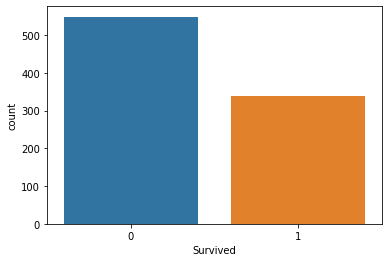

In [13]:
# How much the percentage - Survived or unsurvived at the dataset
print(train["Survived"].value_counts(normalize=True))
sns.countplot(train["Survived"])

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

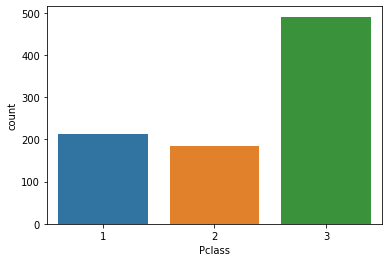

In [14]:
# How much the percentage - Class at the dataset
print(train["Pclass"].value_counts(normalize=True))
sns.countplot(train["Pclass"])

male      0.649044
female    0.350956
Name: Sex, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

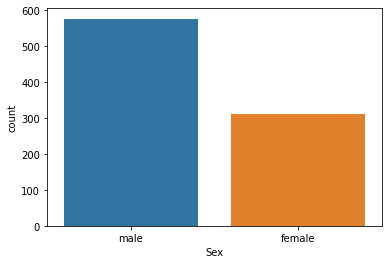

In [15]:
# How much the percentage - Sex at the dataset
print(train["Sex"].value_counts(normalize=True))
sns.countplot(train["Sex"])

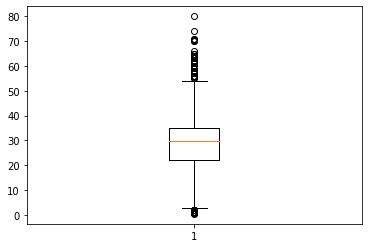

In [16]:
# Age
plt.boxplot(train["Age"])
plt.show()

In [17]:
train["Age"].describe().round(2)

count    889.00
mean      29.65
std       12.97
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: Age, dtype: float64

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

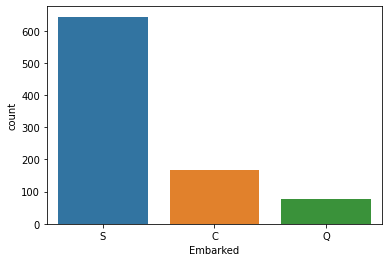

In [18]:
# How much the percentage - Embarked at the dataset
print(train["Embarked"].value_counts(normalize=True))
sns.countplot(train["Embarked"])

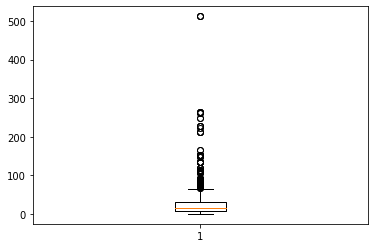

In [19]:
# Fare
plt.boxplot(train["Fare"])
plt.show()

In [20]:
train["Fare"].describe().round(2)

count    889.00
mean      32.10
std       49.70
min        0.00
25%        7.90
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
px.scatter(train,x="Age",y="Fare",color="Survived",animation_frame="Embarked")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Embarked', ylabel='count'>

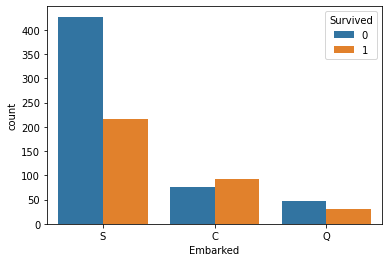

In [23]:
sns.countplot(train["Embarked"],hue=train["Survived"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Pclass', ylabel='count'>

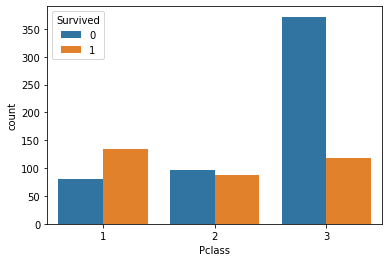

In [24]:
sns.countplot(train["Pclass"],hue=train["Survived"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sex', ylabel='count'>

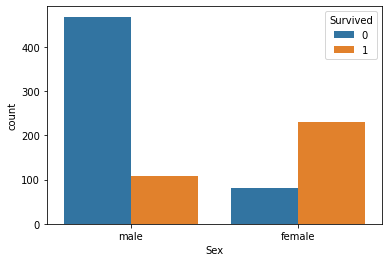

In [25]:
sns.countplot(train["Sex"],hue=train["Survived"])

## Some Summary after Analysis Train DataSet

- Percentage of survivors 62% and non-survivors 38% .
- The highest percentage of survivors are women.
- The highest percentage of survivors is Class 3 at the bottom of the ship. 
- The highest percentage of survivors and non-survivors who climbed from Embarked was named S , And the lowest percentage of Embarked is called Q. 

- The percentage of males is 65% and females 35%.
- The average age is 29 years, there are children and there are elderly people . 
- Average ticket price 32 .

## After take knowledge about the data let start building model

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [28]:
embarked=pd.get_dummies(train["Embarked"],drop_first=True)

In [29]:
new_data=pd.concat([train,sex,embarked],axis=1)

In [30]:
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
# Drop the some columns
new_data.drop(columns=["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 90.5 KB


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
sex1=pd.get_dummies(test["Sex"],drop_first=True)
embarked1=pd.get_dummies(test["Embarked"],drop_first=True)

In [35]:
new_data_test=pd.concat([train,sex1,embarked1],axis=1)

In [36]:
new_data_test.drop(columns=["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [37]:
new_data_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,1.0,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


In [38]:
new_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Defined X value and y value , and split the data train

In [39]:
#Defined X value and y value , and split the data train

X = new_data.drop(['Survived'],axis=1)
y = new_data.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [40]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (666, 9)
X Test  :  (223, 9)
Y Train :  (666,)
Y Test  :  (223,)


## Model Training and Predicting


In [41]:
# Model Training and Predicting

model=LinearRegression()


In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pre=model.predict(X_test)


## Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(y_test,y_pre)

0.30733588185107147

###  Thank you for reading! 🙂